# Построение графиков

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.datasets import load_iris, fetch_california_housing, load_linnerud

# Устанавливаем стиль визуализаций в matplotlib
%matplotlib inline
plt.style.use('seaborn')

from warnings import simplefilter
simplefilter('ignore')

## Линейный график

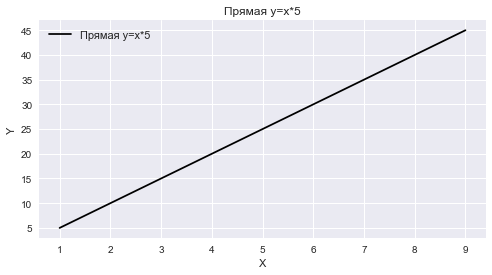

In [38]:
# фигура + координатная плоскость
fig, ax = plt.subplots(figsize=(8, 4)) 

# точки по осям X и Y
x_items = np.arange(1, 10, 1, dtype=None)
y_items = 5 * x_items

# линейный график
ax.plot(x_items, y_items, color='black', label='Прямая y=x*5') 

# название графика
ax.set_title('Прямая y=x*5')

 # название оси абсцисс
ax.set_xlabel('X') 
    
# название оси ординат
ax.set_ylabel('Y') 
    
# легенда
ax.legend(facecolor='white', fontsize=11) 

## Диаграмма рассеяния

In [39]:
# Загрузим данные о планетах
planets_data = sns.load_dataset('planets')
planets_data.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


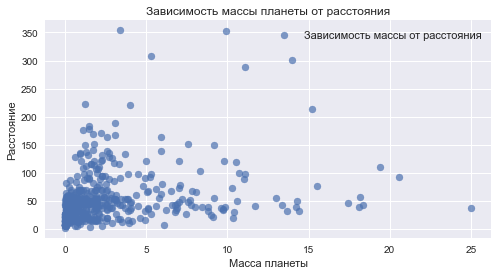

In [40]:
# фигура + координатная плоскость
fig, ax = plt.subplots(figsize=(8, 4)) 

# диаграмма рассеяния
ax.scatter(planets_data['mass'], planets_data['distance'], alpha=0.7, label='Зависимость массы от расстояния') 

# название графика
ax.set_title('Зависимость массы планеты от расстояния')

 # название оси абсцисс
ax.set_xlabel('Масса планеты') 
    
# название оси ординат
ax.set_ylabel('Расстояние') 
    
# легенда
ax.legend(facecolor='white', fontsize=11) 

## Диаграмма рассеяния с цветовой группировкой

In [41]:
# Загрузим данные об ирисах
iris_full_data = load_iris(as_frame=True)

iris_data = iris_full_data['frame']
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


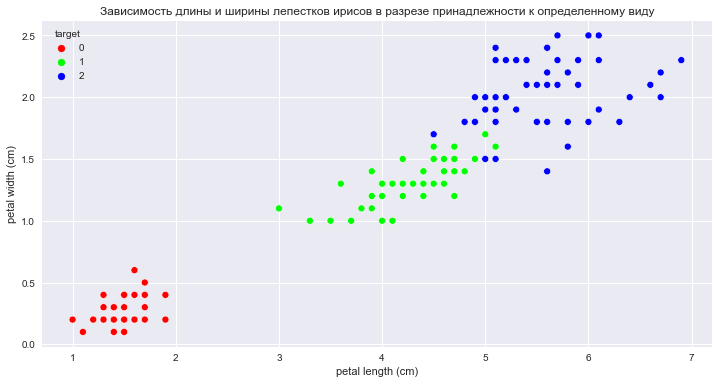

In [52]:
# фигура + координатная плоскость
fig, ax = plt.subplots(figsize = (12, 6)) 

# диаграмма рассеяния
sns.scatterplot(
    data=iris_data, # датасет
    x='petal length (cm)', # ось абсцисс
    y='petal width (cm)', # ось ординат
    hue='target', # группировка
    palette={0: '#ff0000', 1: '#00ff00', 2: '#0000ff'}, # словарь с соответствием значений из target цвету точки
    ax=ax, # координатная плоскость
);

# Задаём название графику
ax.set_title('Зависимость длины и ширины лепестков ирисов в разрезе принадлежности к определенному виду');

## Коробчатая диаграмма

**Для одного признака.**

Будем использовать данные о планетах.

Text(0.5, 0, 'Масса планеты')

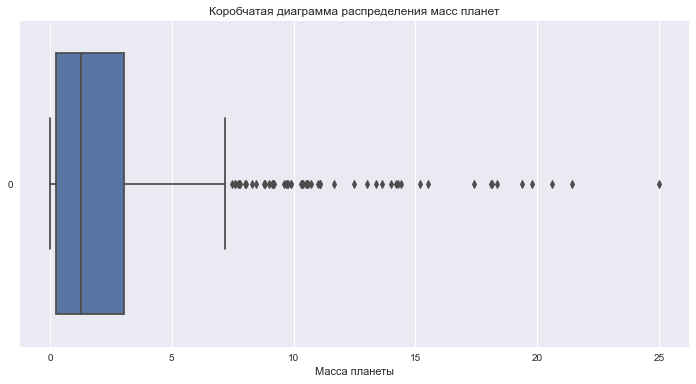

In [43]:
# фигура + координатная плоскость
fig, ax = plt.subplots(figsize=(12, 6)) 

# строим boxplot
sns.boxplot(data=planets_data['mass'], orient='h', ax=ax)

# название графика
ax.set_title('Коробчатая диаграмма распределения масс планет') 

# название оси абсцисс
ax.set_xlabel('Масса планеты') 

**Для нескольких признаков.**

Будем использовать данные об ирисах

Text(0, 0.5, 'Параметр ириса')

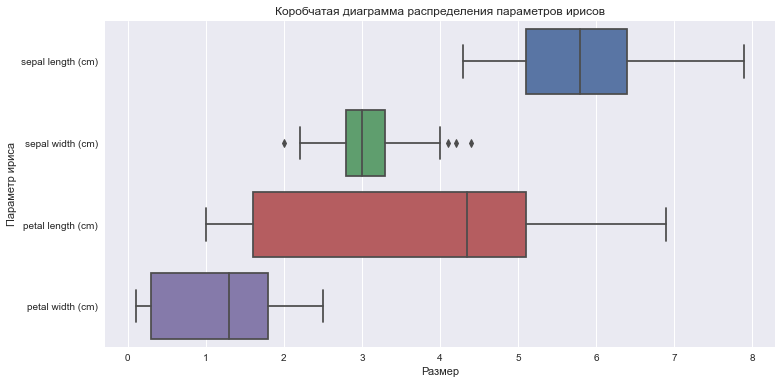

In [44]:
# фигура + координатная плоскость
fig, ax = plt.subplots(figsize=(12, 6)) 

# строим boxplot
sns.boxplot(data=iris_data.drop(['target'], axis=1), orient='h', ax=ax)

# название графика
ax.set_title('Коробчатая диаграмма распределения параметров ирисов') 

# название оси абсцисс
ax.set_xlabel('Размер') 

# название оси ординат
ax.set_ylabel('Параметр ириса') 

## Гистограмма

In [45]:
# возьмем данные о домах в Калиформии
full_housing_data = fetch_california_housing(as_frame=True)

housing_data = full_housing_data['frame']
housing_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


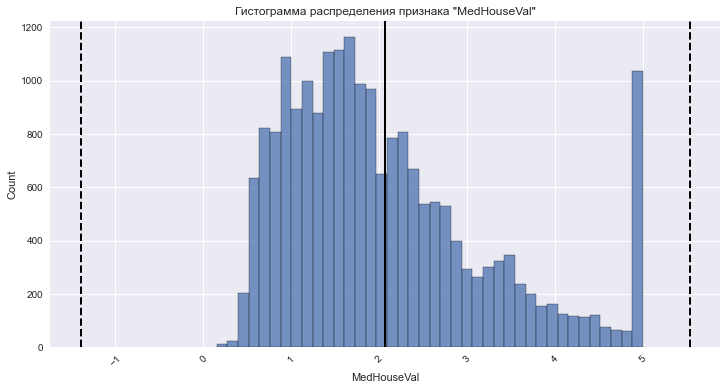

In [46]:
# фигура + координатная плоскость
fig, ax = plt.subplots(figsize=(12, 6)) 

# название признака, по которому будем строить гистограмму
feature_name = 'MedHouseVal'

# строим гистограмму распределения признака 
histplot = sns.histplot(data=housing_data, x=feature_name, bins=40, ax=ax)

# добавляем вертикальные линии для среднего и 3ех стандартных отклонений влево и вправо от среднего
ax.axvline(housing_data[feature_name].mean(), color='k', lw=2)
ax.axvline(housing_data[feature_name].mean() - 3*housing_data[feature_name].std(), color='k', ls='--', lw=2)
ax.axvline(housing_data[feature_name].mean() + 3*housing_data[feature_name].std(), color='k', ls='--', lw=2)

# название графика
histplot.set_title(f'Гистограмма распределения признака "{feature_name}"')

# поворот отметок на оси абсцисс (просто для примера)
histplot.xaxis.set_tick_params(rotation=45)

## Визуализации распределения наблюдений в наборе данных

Метод визуализации [kdeplot()](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) — это метод визуализации распределения наблюдений в наборе данных. \
Он представляет собой непрерывную линию плотности вероятности.

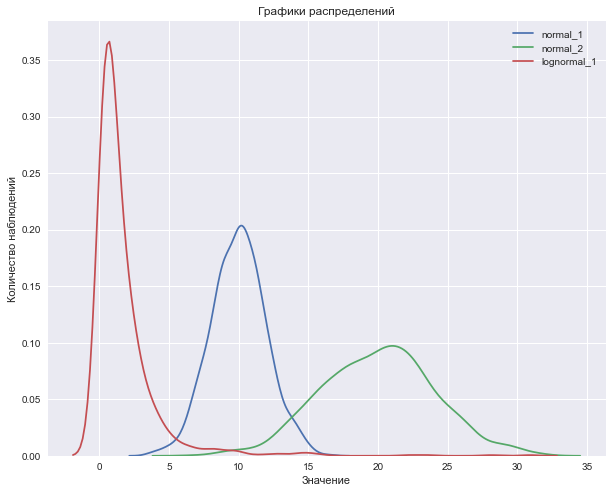

In [8]:
# сгенерируем датасет из случайных чисел
random_data = pd.DataFrame({   
    # Нормальное распределение, 10 – среднее значение, 2 – стандартное отклонение, 1000 – количество сэмплов
    'normal_1': np.random.normal(10, 2, 1000),
    
    # Нормальное распределение, 10 – среднее значение, 4 – стандартное отклонение, 1000 – количество сэмплов
    'normal_2': np.random.normal(20, 4, 1000),
    
    # Лонгнормальное распределение
    # 30 - Среднее значение основного нормального распределения, 6 – стандартное отклонение, 
    # 1000 – количество сэмплов
    'lognormal_1': np.random.lognormal(0, 1, 1000),
})

# фигура + координатная плоскость
fig, ax = plt.subplots(ncols=1, figsize=(10, 8))
ax.set_title('Графики распределений')
ax.set_xlabel('Значение')
ax.set_ylabel('Количество наблюдений')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(random_data['normal_1'], ax=ax, label ='normal_1')
sns.kdeplot(random_data['normal_2'], ax=ax, label ='normal_2')
sns.kdeplot(random_data['lognormal_1'], ax=ax, label ='lognormal_1')
plt.legend()

## Диаграмма рассеяния + линейная регрессия

In [47]:
# возьмем данные физических параметрах, нагрузке и пульсе
full_linnerud_data = load_linnerud(as_frame=True)

linnerud_data = full_linnerud_data['frame']
linnerud_data.head()

,Chins,Situps,Jumps,Weight,Waist,Pulse
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0


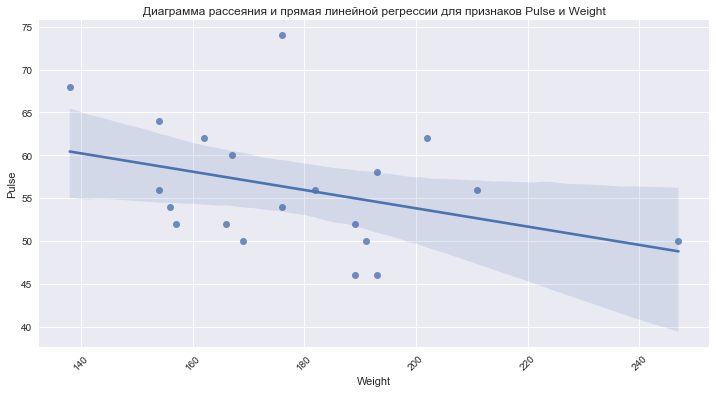

In [48]:
# фигура + координатная плоскость
fig, ax = plt.subplots(figsize=(12, 6)) 

# название признака, по которому будем строить график
feature_name = 'Weight'

# строим диаграмму рассеяния + линейную регрессию
regplot = sns.regplot(data=linnerud_data, x=feature_name, y='Pulse', ax=ax)

# название графика
regplot.set_title(f'Диаграмма рассеяния и прямая линейной регрессии для признаков Pulse и {feature_name}')

# добавляем поворот отметок на оси абсцисс (для примера)
regplot.xaxis.set_tick_params(rotation=45)

## Гистограмма, диаграмма рассеяния и линейная регрессия для нескольких признаков

Здесь также воспользуемся данными о физических параметрах пациентов, нагрузке и пульсе.

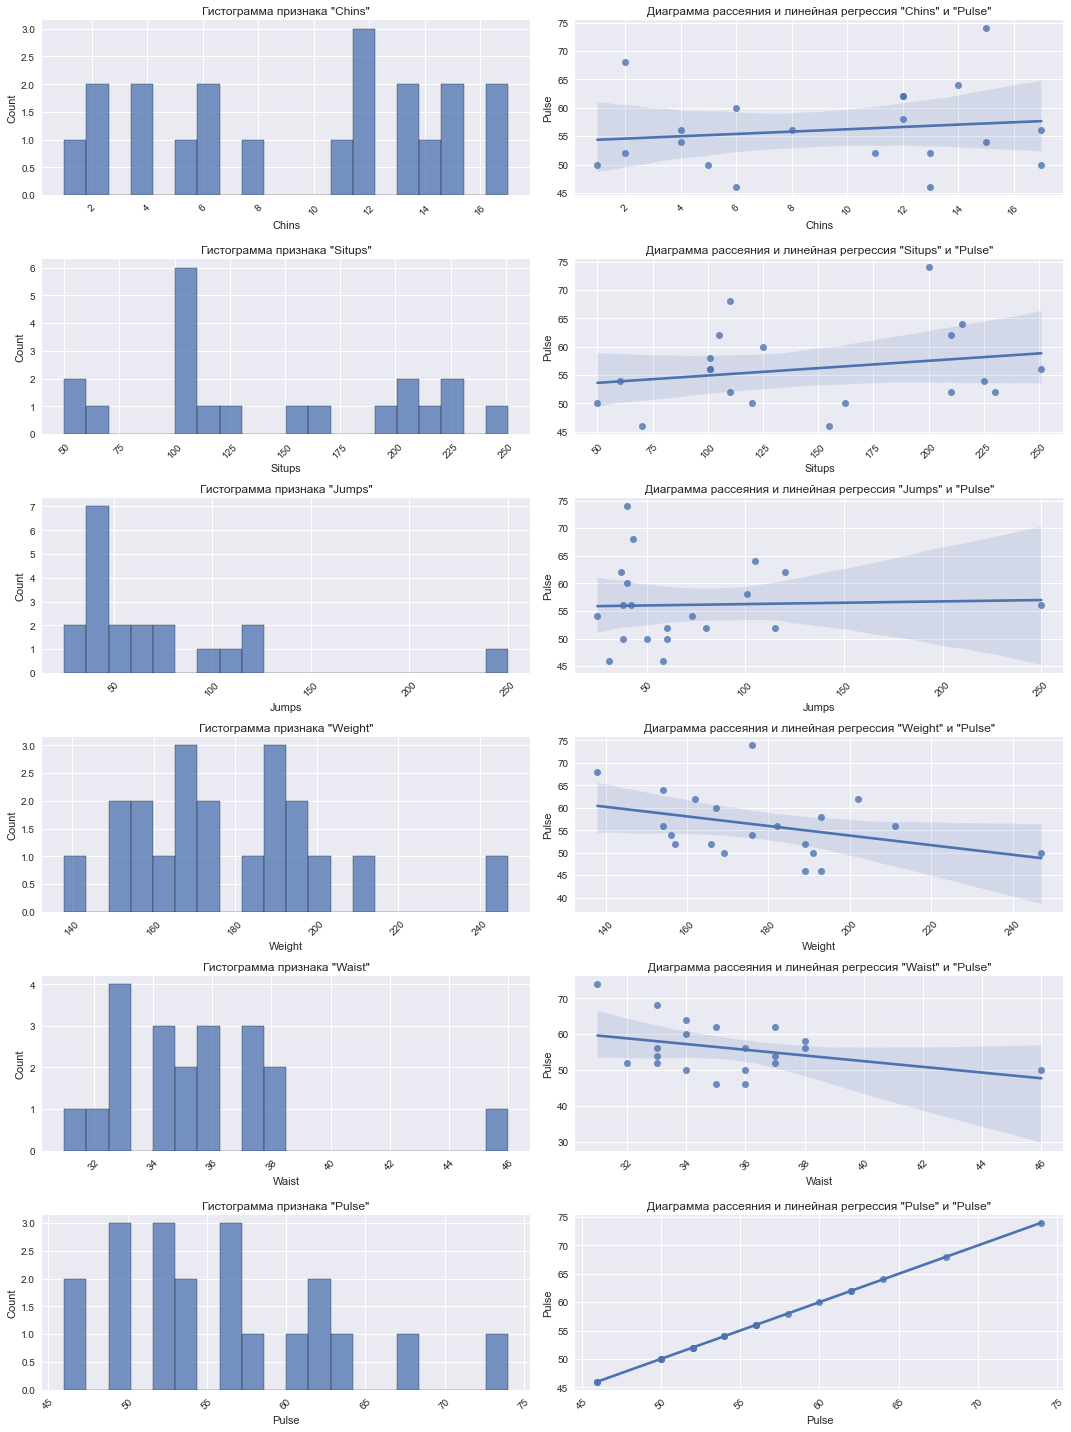

In [49]:
# выделим числовые признаки
types = linnerud_data.dtypes
num_features = list(types[(types != 'object')].index)
num_features

# общее количество числовых признаков
features_count = len(num_features)

# фигура + features_count х 2 координатных плоскостей
fig, axes = plt.subplots(features_count, 2, figsize=(15, 20)) 

# создаем цикл для всех признаков из списка числовых признаков
# i- индекс, feature - название признака в таблице
for i, feature in enumerate(num_features): 
    # гистограмма
    histplot = sns.histplot(data=linnerud_data, x=feature, bins=20, ax=axes[i][0])
    
    # название графика
    histplot.set_title(f'Гистограмма признака "{feature}"')
    
    # поворот отметок на оси абсцисс
    histplot.xaxis.set_tick_params(rotation=45)
    
    # диаграмма рассеяния + линейная регрессия
    regplot = sns.regplot(data=linnerud_data, x=feature, y='Pulse', ax=axes[i][1])
    
    # название графика
    regplot.set_title(f'Диаграмма рассеяния и линейная регрессия "{feature}" и "Pulse"');
    
    # поворот отметок на оси абсцисс
    regplot.xaxis.set_tick_params(rotation=45)

# выравнивание графиков
plt.tight_layout() 

## Тепловая карта для матрицы корреляций

И здесь воспользуемся данными о физических параметрах пациентов, нагрузке и пульсе.

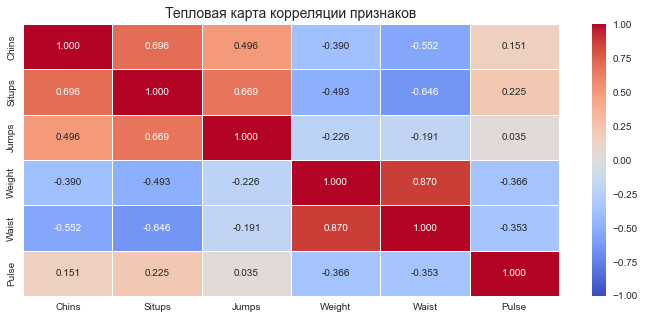

In [50]:
# фигура и координатная плоскость
fig, axes = plt.subplots(figsize=(12, 5))

# параметры тепловой карты
sns.heatmap(
    # pearson - значение по умолчанию. 
    # также можно задать kendall или spearman 
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
    linnerud_data.corr(method='pearson'), 
    annot=True, 
    vmin=-1, 
    vmax=1, 
    center=0, 
    linewidths=.9, 
    ax=axes, 
    fmt='.3f', 
    cmap='coolwarm'
)
plt.title('Тепловая карта корреляции признаков', fontsize=14)

# Выведем график
plt.show()